# Load Video

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

video_path = '1.mp4'  

# Frame Extraction

In [15]:
cap = cv2.VideoCapture(video_path)
if not cap.isOpened():
    print("Error: Could not open video.")
frames_dir = 'extracted_frames'
os.makedirs(frames_dir, exist_ok=True)
frame_count = 0
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break
    frame_filename = os.path.join(frames_dir, f'frame_{frame_count:04d}.png') 
    cv2.imwrite(frame_filename, frame)
    frame_count += 1
cap.release()
print(f"Total frames extracted and saved: {frame_count}")

Total frames extracted and saved: 1114


Frames


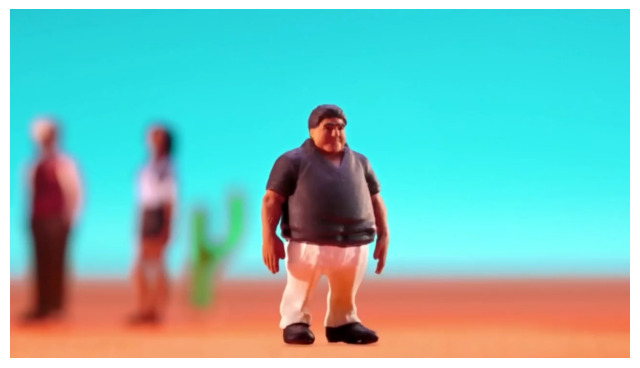

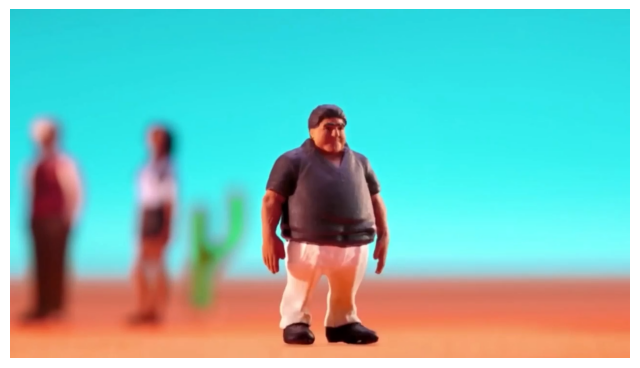

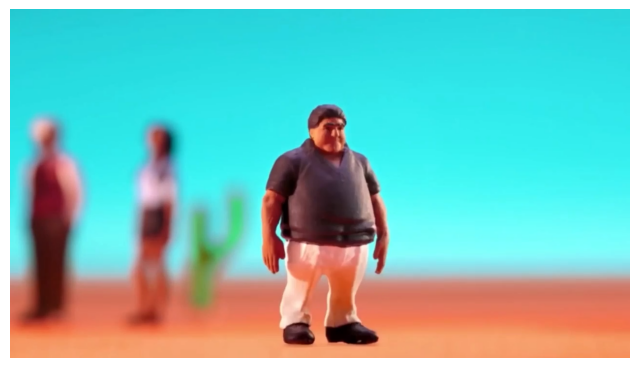

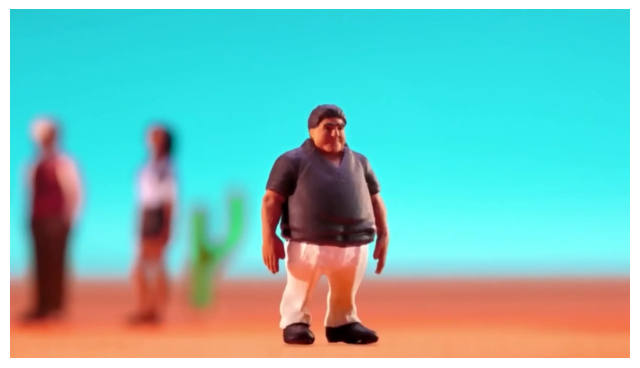

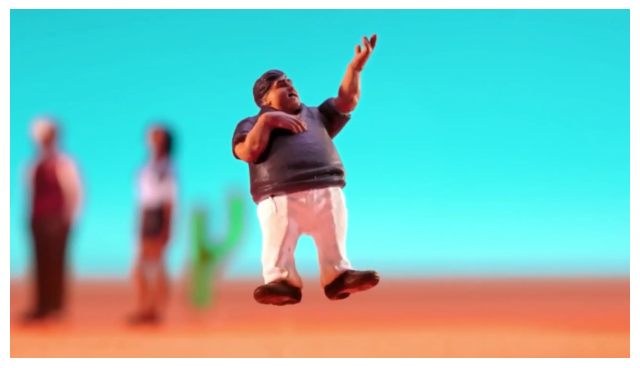

In [9]:
frames = [cv2.imread(os.path.join(frames_dir, f'frame_{i:04d}.png')) for i in range(frame_count)]
def display_extracted_frames(frames, num_frames=5):
    for i in range(min(num_frames, len(frames))):
        plt.figure(figsize=(8, 6))
        plt.imshow(cv2.cvtColor(frames[i], cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.show()
print('Frames')
display_extracted_frames(frames, num_frames=5)


# Spatio-Temporal Segmentation

Segmented Frames


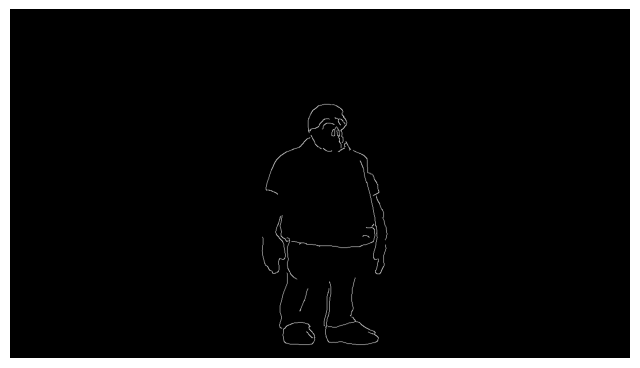

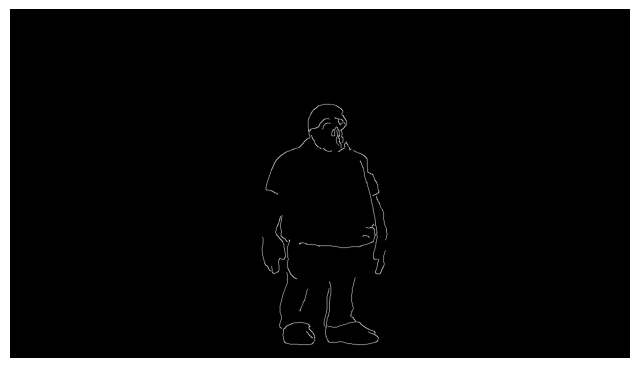

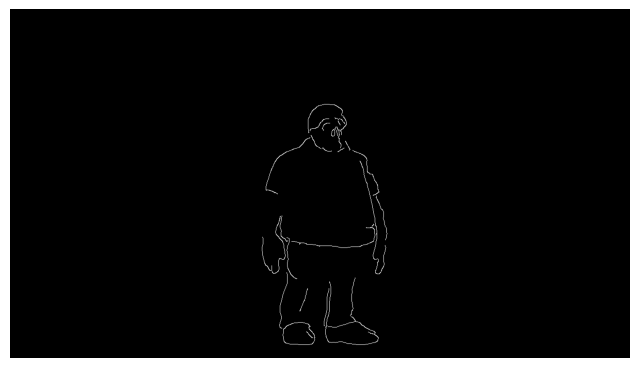

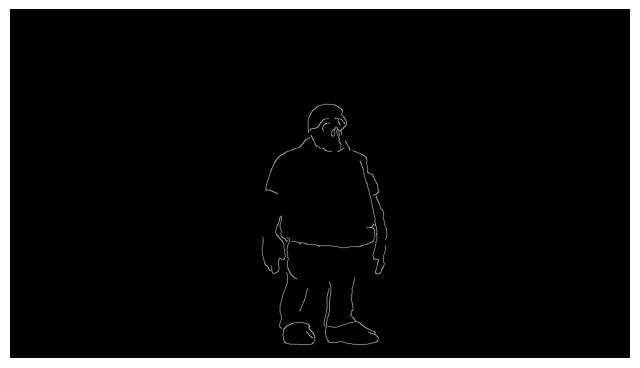

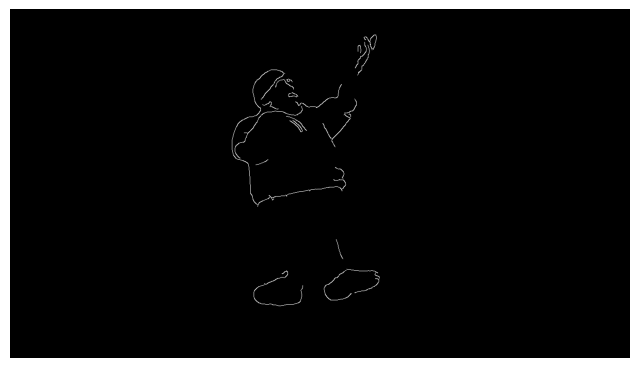

In [10]:
def segment_frame_with_edges(frame):
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    blurred_frame = cv2.GaussianBlur(gray_frame, (5, 5), 1.5)
    edges = cv2.Canny(blurred_frame, 100, 200)
    return edges
segmented_frames_with_edges = [segment_frame_with_edges(frame) for frame in frames]
def display_segmented_frames(frames_with_edges, num_frames=5):
    for i in range(min(num_frames, len(frames_with_edges))):
        plt.figure(figsize=(8, 6))
        plt.imshow(frames_with_edges[i], cmap='gray')
        plt.axis('off')
        plt.show()
print('Segmented Frames')
display_segmented_frames(segmented_frames_with_edges, num_frames=5)


 # Scene Cut Detection

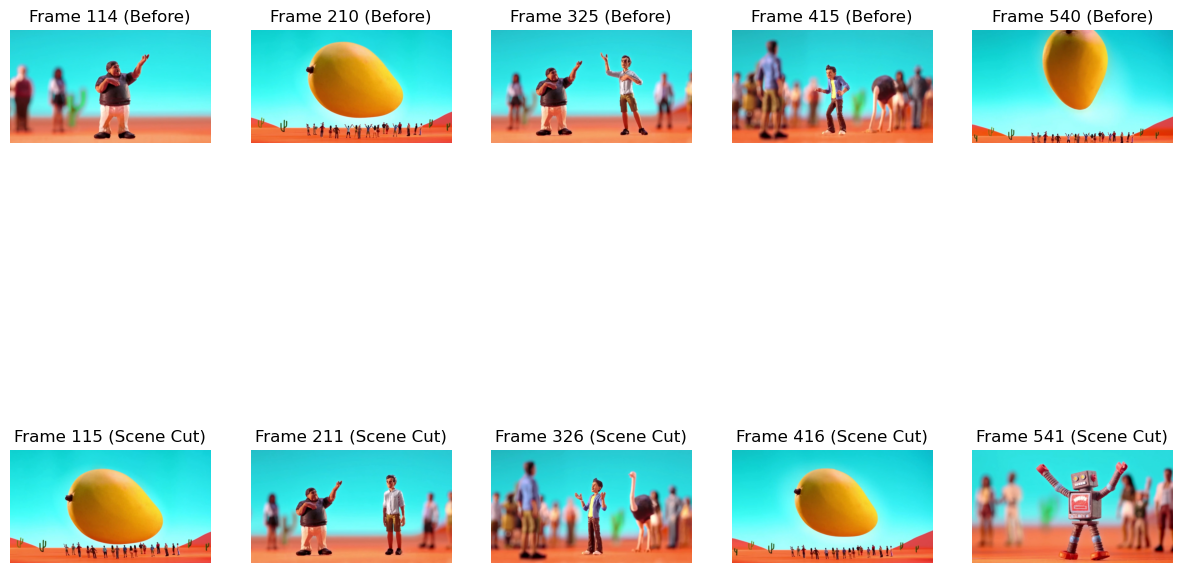

In [11]:
def detect_scene_cuts(frames):
    scene_cuts = []
    for i in range(1, len(frames)):
        diff = cv2.absdiff(cv2.cvtColor(frames[i-1], cv2.COLOR_BGR2GRAY),
                           cv2.cvtColor(frames[i], cv2.COLOR_BGR2GRAY))
        mean_diff = np.mean(diff)
        if mean_diff > 30: 
            scene_cuts.append(i)
    return scene_cuts
scene_cut_indices = detect_scene_cuts(frames)
def display_scene_cut_frames(frames, scene_cut_indices, before_after=1):
    plt.figure(figsize=(15, 10))
    for i, index in enumerate(scene_cut_indices[:before_after]):
        plt.subplot(2, before_after, i + 1)
        plt.imshow(cv2.cvtColor(frames[index - 1], cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.title(f'Frame {index - 1} (Before)')
        plt.subplot(2, before_after, before_after + i + 1)
        plt.imshow(cv2.cvtColor(frames[index], cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.title(f'Frame {index} (Scene Cut)')
    plt.show()
display_scene_cut_frames(frames, scene_cut_indices, before_after=5)


# Mark Scene Cuts

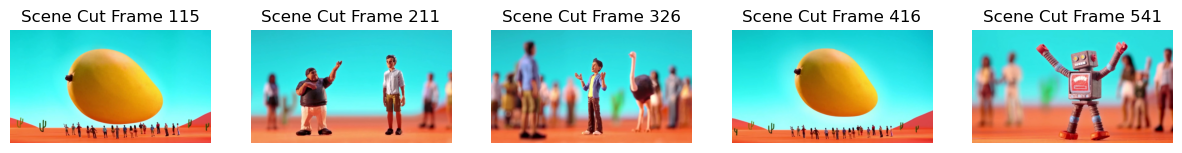

In [12]:
marked_frames = frames.copy()
def display_marked_scene_cut_frames(frames, scene_cut_indices, num_cuts=5):
    plt.figure(figsize=(15, 10))
    for i in range(min(num_cuts, len(scene_cut_indices))):
        plt.subplot(1, num_cuts, i + 1)
        plt.imshow(cv2.cvtColor(frames[scene_cut_indices[i]], cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.title(f'Scene Cut Frame {scene_cut_indices[i]}')
    plt.show()
display_marked_scene_cut_frames(marked_frames, scene_cut_indices, num_cuts=5)


# Result Visualization

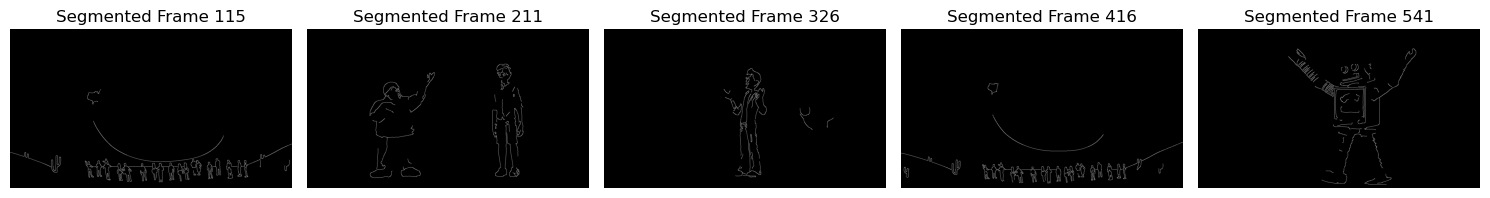

In [13]:
def segment_frame_with_edges(frame):
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    blurred_frame = cv2.GaussianBlur(gray_frame, (5, 5), 1.5)
    edges = cv2.Canny(blurred_frame, 100, 200)
    return edges
def display_segmented_scene_cut_frames(frames, scene_cut_indices, num_cuts=5):
    plt.figure(figsize=(15, 10))
    for i in range(min(num_cuts, len(scene_cut_indices))):
        index = scene_cut_indices[i]
        segmented_frame = segment_frame_with_edges(frames[index])
        plt.subplot(2, num_cuts, num_cuts + i + 1)
        plt.imshow(segmented_frame, cmap='gray')
        plt.axis('off')
        plt.title(f'Segmented Frame {index}')
    
    plt.tight_layout()  
    plt.show()

display_segmented_scene_cut_frames(marked_frames, scene_cut_indices, num_cuts=5)
